# Copula-based object detection

In [2]:
f"{0:06d}.png", f"{4325:06d}.png", "000000.png"

('000000.png', '004325.png', '000000.png')

In [6]:
import pandas as pd
from typing import Tuple, List


def make_entry(UQers: List = ["Bonferroni", "Max additive"],
               Bounds: List = ["Lower bound", "Upper bound"],
               obj_fields = ["x_min", "y_min", "x_max", "y_max"],
               imgs: List = [f"{i:06d}.png" for i in range(2)], 
               objs: List = [f"object_{i}" for i in range(2)]) -> Tuple:
    rows = pd.MultiIndex.from_product(
        (imgs, objs), names=["images", "objects"])
    columns = pd.MultiIndex.from_product(
        (UQers, obj_fields, Bounds), 
        names=["UQ methods", "object's fields", "Bounds"])
    return rows, columns

rows1, columns1 = make_entry(UQers=["Ground truths", "Preds"],
                             Bounds=["Exact value"])
rows2, columns2 = make_entry()

df1 = pd.DataFrame(index=rows1, columns=columns1)
df2 = pd.DataFrame(index=rows2, columns=columns2)
df = pd.concat([df1, df2], axis=1) #, ignore_index=True)

df["Bonferroni", "x_min", "Lower bound"].loc["0.png", "object_0"] = 12
df

UQ methods          Ground truths                                      \
object's fields             x_min       y_min       x_max       y_max   
Bounds                Exact value Exact value Exact value Exact value   
images     objects                                                      
000000.png object_0           NaN         NaN         NaN         NaN   
           object_1           NaN         NaN         NaN         NaN   
000001.png object_0           NaN         NaN         NaN         NaN   
           object_1           NaN         NaN         NaN         NaN   

UQ methods                Preds                                      \
object's fields           x_min       y_min       x_max       y_max   
Bounds              Exact value Exact value Exact value Exact value   
images     objects                                                    
000000.png object_0         NaN         NaN         NaN         NaN   
           object_1         NaN         NaN         NaN         NaN   
000001.png object_0         NaN         NaN         NaN         NaN   
           object_1         NaN         NaN         NaN         NaN   

UQ methods           Bonferroni              ...                          \
object's fields           x_min              ...       y_max               
Bounds              Lower bound Upper bound  ... Lower bound Upper bound   
images     objects                           ...                           
000000.png object_0         NaN         NaN  ...         NaN         NaN   
           object_1         NaN         NaN  ...         NaN         NaN   
000001.png object_0         NaN         NaN  ...         NaN         NaN   
           object_1         NaN         NaN  ...         NaN         NaN   

UQ methods          Max additive                                      \
object's fields            x_min                   y_min               
Bounds               Lower bound Upper bound Lower bound Upper bound   
images     objects                                                     
000000.png object_0          NaN         NaN         NaN         NaN   
           object_1          NaN         NaN         NaN         NaN   
000001.png object_0          NaN         NaN         NaN         NaN   
           object_1          NaN         NaN         NaN         NaN   

UQ methods                                                           
object's fields           x_max                   y_max              
Bounds              Lower bound Upper bound Lower bound Upper bound  
images     objects                                                   
000000.png object_0         NaN         NaN         NaN         NaN  
           object_1         NaN         NaN         NaN         NaN  
000001.png object_0         NaN         NaN         NaN         NaN  
           object_1         NaN         NaN         NaN         NaN  

[4 rows x 24 columns]

In [42]:
import pickle as pkl
from src.conformalizers import (
    BonferroniAdditiveConformalizer as B,
    MaxAdditiveConformalizer as M,
    ImprovedEmpiricalConformalizer as E,
    ImprovedGumbelConformalizer as G,
    ImprovedIndependentConformalizer as I
)

logged = [{'cfzm': B()}] #, {'cfzm': M()}, {'cfzm': E()}, {'cfzm': G()}, {'cfzm': I()}]
with open(f"demo.pkl", 'wb') as f:
    pkl.dump(logged, f)

with open(f"demo.pkl", 'rb') as f:
    loaded = pkl.load(f)

assert loaded == logged, (logged, "\n", loaded)

AssertionError: ([{'cfzm': <src.conformalizers.BonferroniAdditiveConformalizer object at 0x7f3045ee1e50>}], '\n', [{'cfzm': <src.conformalizers.BonferroniAdditiveConformalizer object at 0x7f30498109a0>}])

In [ ]:
from src.data import FullKitti
from src.reporting import (
    UQEvalResults, DatasetDescriber, 
    DissimilarityReporter,
    ValidityReporter, EfficiencyReporter,
    SummaryReporter
)
from src.metrics import hypercube_volumes
from src.utils import set_random_seed

/home/lab/bcyusamu/miniconda3/envs/TBD/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Experiments

In [ ]:
folds, version = 10, "__release", #"_sn_release" #"_release2", "_cure_gumbel" #"_break_max" #"_release" #"_splits_dbg"
approaches = ['Bonferroni',
              'Max additive', 
              ##"Independent CCP", 
              ##"Gumbel CCP", 
              ##"Empirical CCP",
              "Independent DE-CCP", 
              "Gumbel DE-CCP",
              'Empirical DE-CCP',
              ##'s.n. Bonferroni',
              ##'Max multiplicative',
              ##"s.n. Independent DE-CCP",
              ##"s.n. Gumbel DE-CCP",
              ##'s.n. Empirical DE-CCP',
              #"Imp. Gumbel Cop",
              #"Imp. Empirical Cop.",
              #'signed Bonferroni', 
              #'signed Max additive', 
              #'signed Independent Cop.', 
              #"signed Gumbel Cop.", 
              #'signed Empirical Cop.'
              #"V. Empirical Cop.",
              #"IoU Empirical Cop.",
              ]
approaches = [{'cfmz_name': v} for v in approaches]


### Experiment N° 1: inter-dependent dissimilarities

In [ ]:
filename = f"results/with_inter-dependent_dissimilarities{version}.pkl"
filter = {'dts_name': 'KITTI', 'split_num': 1, 'dtr_name': 'Correlated D.'}
res = UQEvalResults()
res.load(filename)

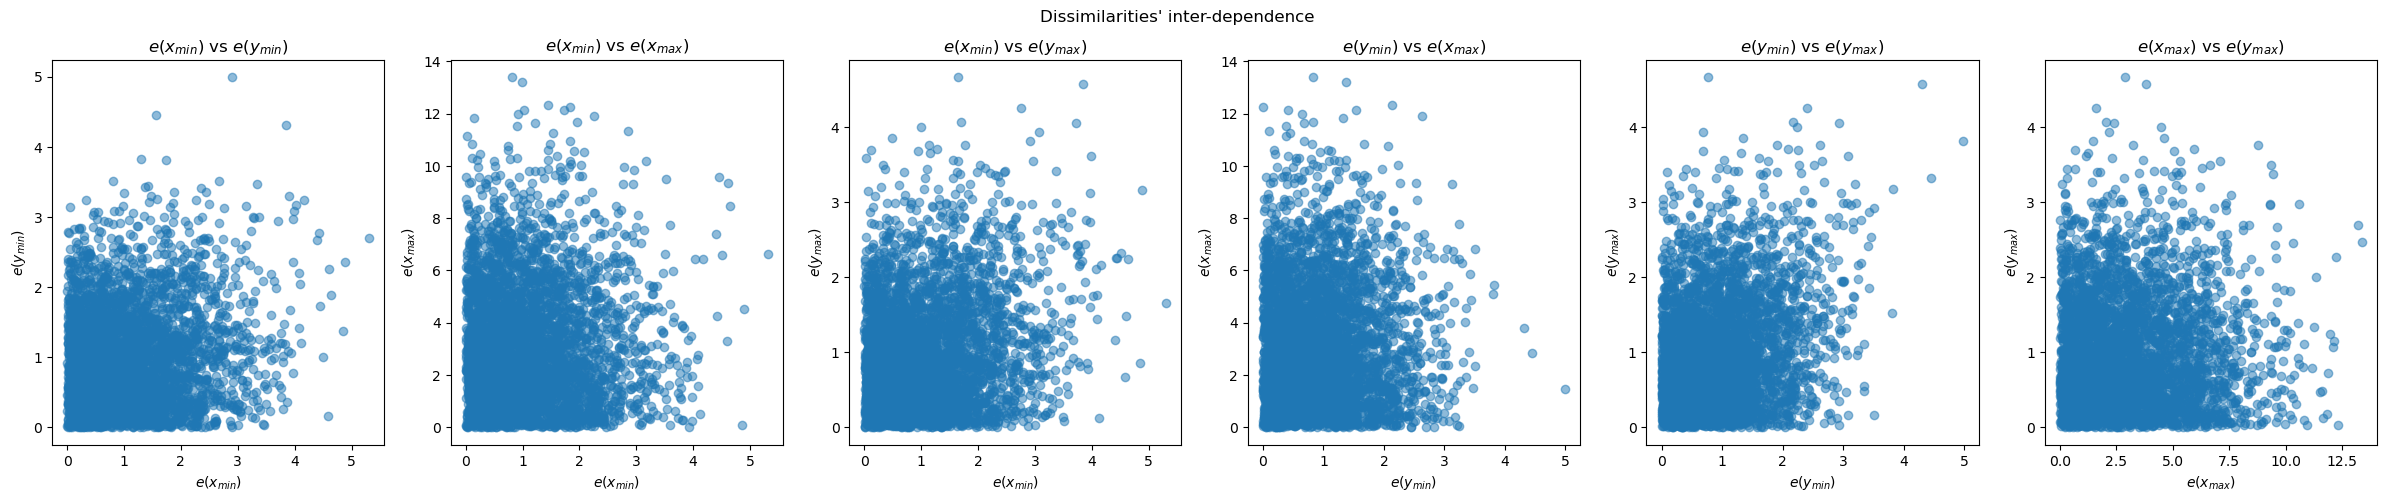

Num dissimilarities:  3953


Qp%       Avg       Std      Qrt1      Qrt2      Qrt3
Dim 0  2.889203  1.010183  0.701521  0.431025  0.890509  1.494347
Dim 1  2.402866  0.870655  0.600437  0.364181  0.787950  1.283562
Dim 2  7.719013  2.801912  1.954859  1.195333  2.451723  4.177505
Dim 3  2.539673  0.897860  0.622285  0.385962  0.790297  1.317762

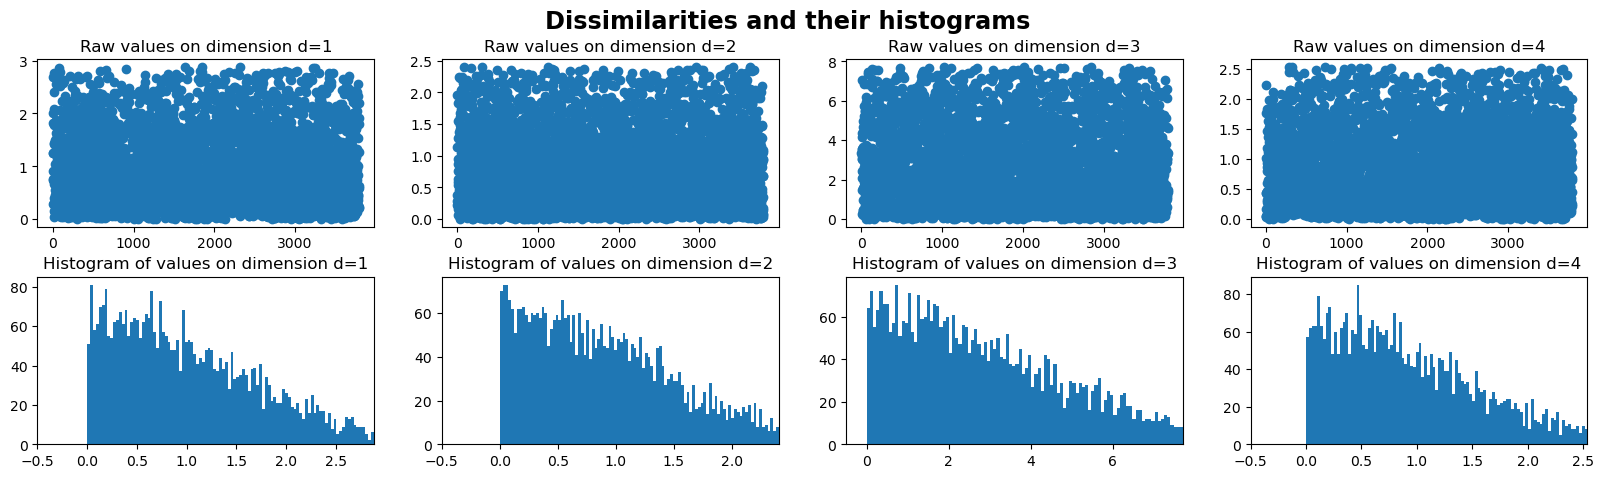

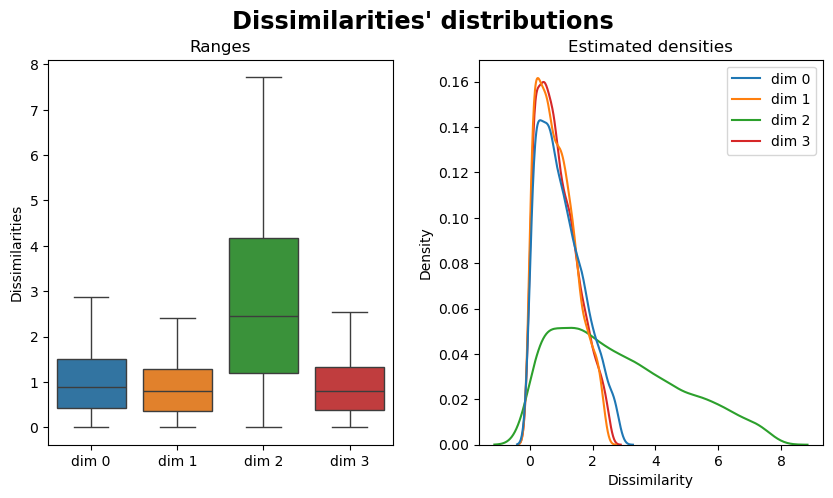

In [ ]:
DissimilarityReporter(filter).report(res)

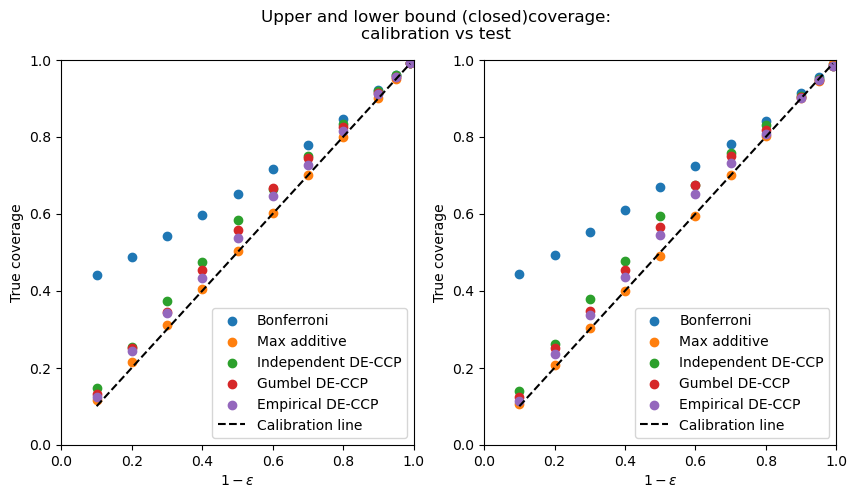

In [ ]:
ValidityReporter(approaches, filter).report(res)

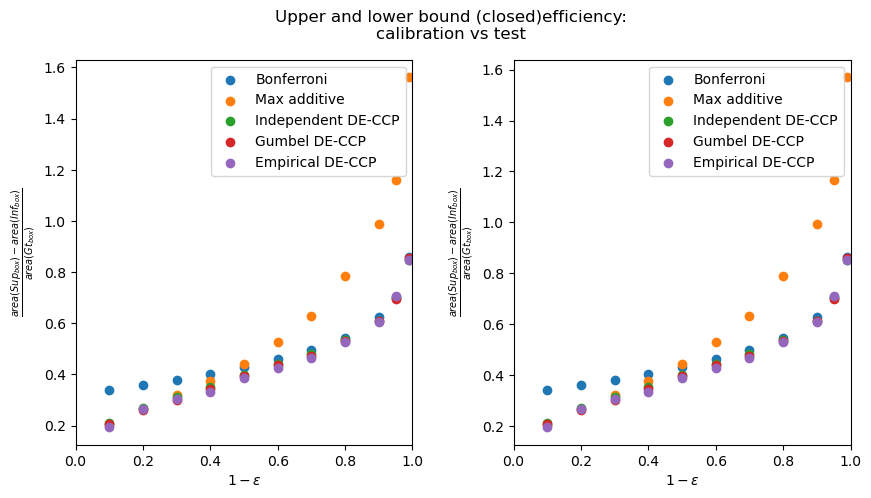

In [ ]:
EfficiencyReporter(approaches, filter).report(res)

### Experiment N° 2: independent dissimilarities

In [ ]:
filename2 = f"results/with_indepedent_dissimilarities{version}.pkl"
approaches2 = approaches
filter2 = {'dts_name': 'KITTI', 'split_num': 1, 'dtr_name': 'Correlated D.'}
res2 = UQEvalResults()
res2.load(filename2)

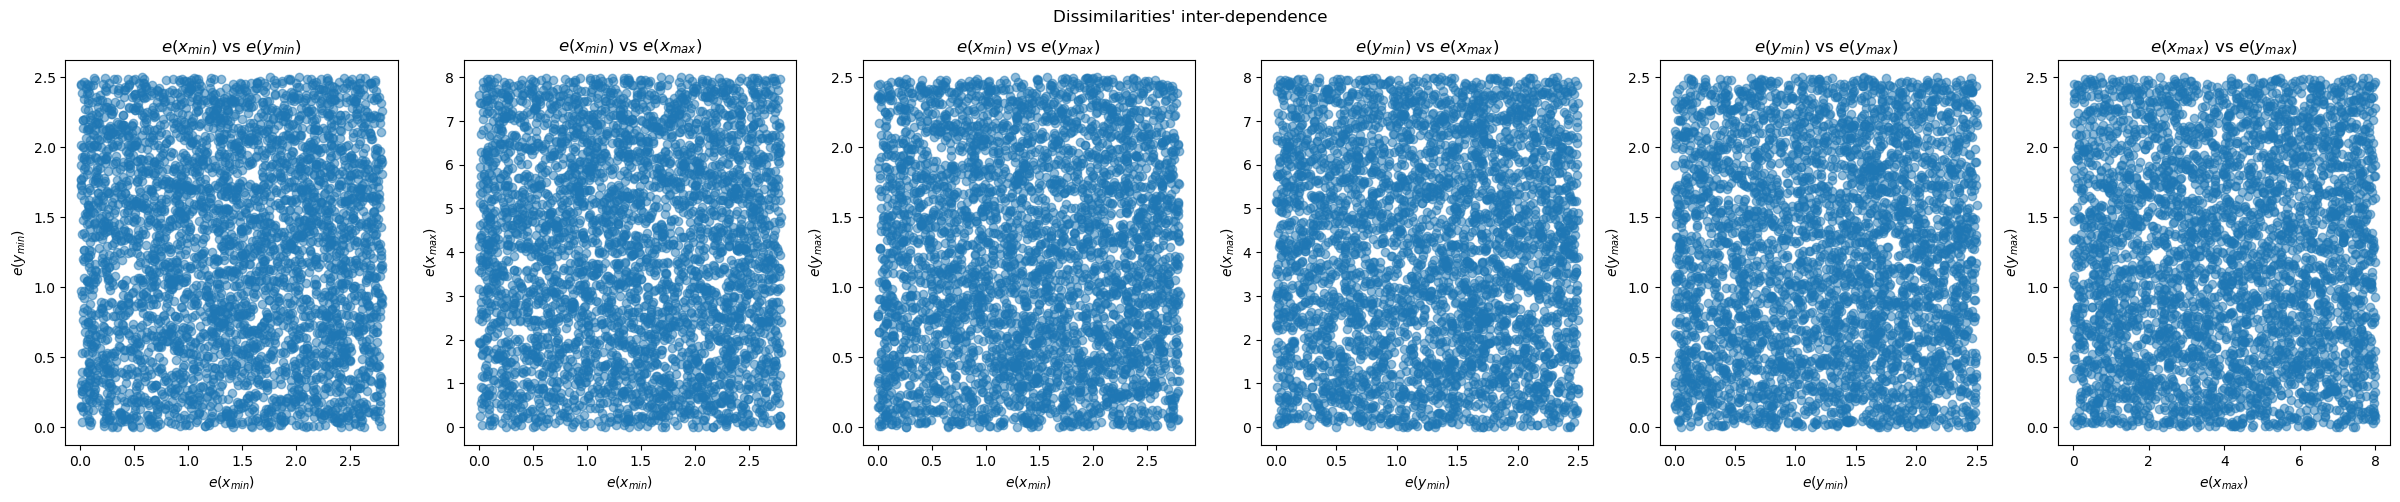

Num dissimilarities:  3953


Qp%       Avg       Std      Qrt1      Qrt2      Qrt3
Dim 0  2.681706  1.359000  0.775866  0.694222  1.364374  2.037962
Dim 1  2.396643  1.214431  0.694997  0.615729  1.241267  1.810474
Dim 2  7.674122  3.867456  2.220124  1.940994  3.876069  5.771842
Dim 3  2.398348  1.176992  0.692521  0.577454  1.154009  1.773739

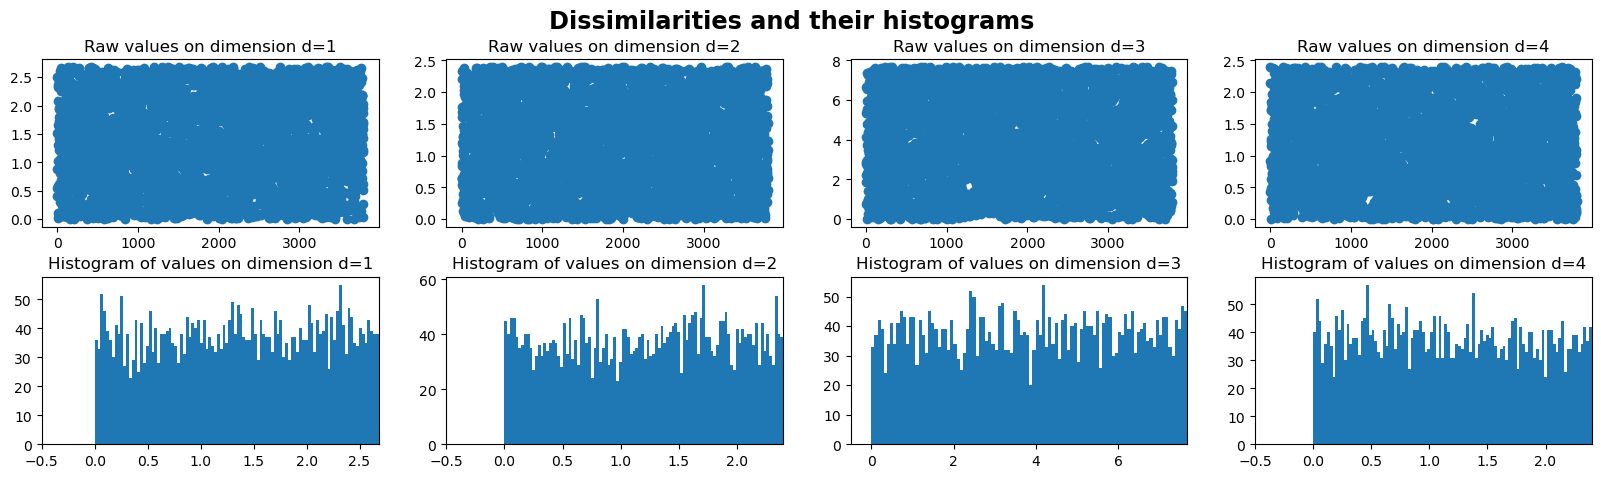

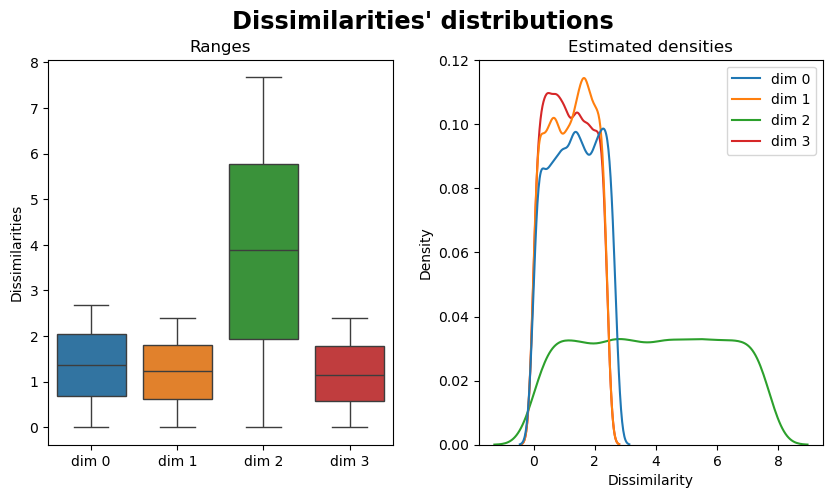

In [ ]:
DissimilarityReporter(filter2).report(res2)

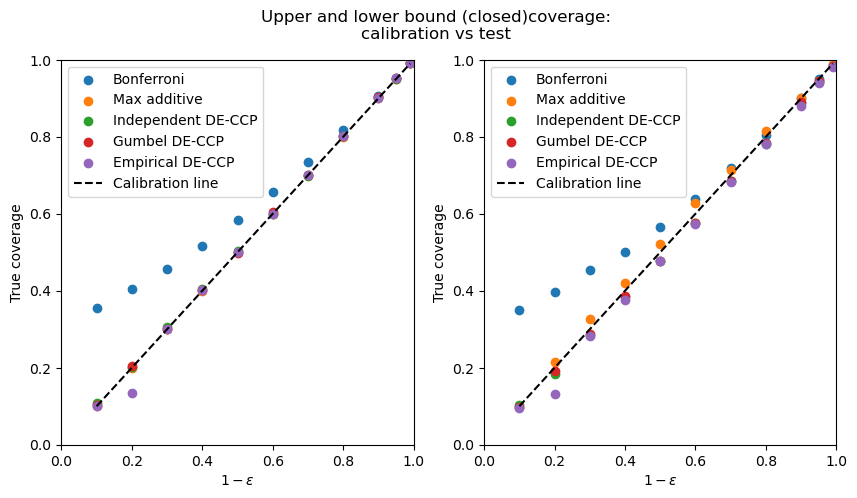

In [ ]:
ValidityReporter(approaches2, filter2).report(res2)

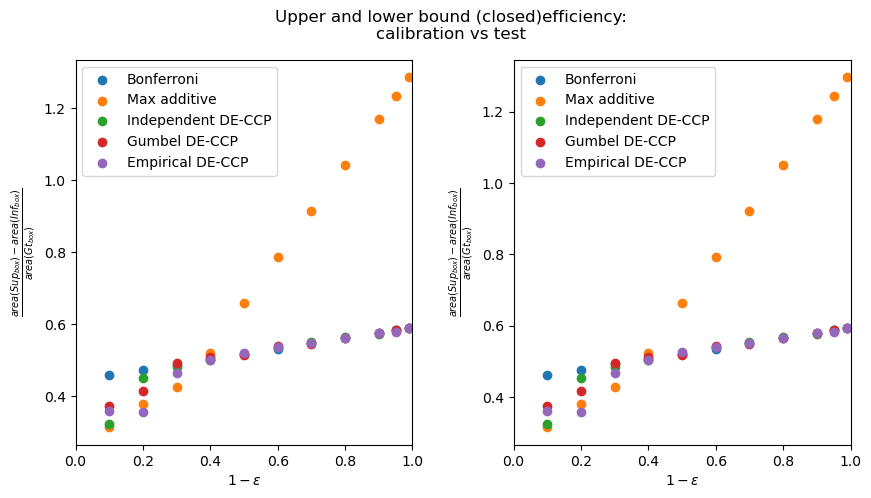

In [ ]:
EfficiencyReporter(approaches2, filter2).report(res2)

### Experiment N° 3: YOLOv8's dissimilarities

In [ ]:
filename3 = f"results/with_YOLOv8_dissimilarities{version}.pkl"
approaches3 = approaches
filter3 = {'dts_name': 'KITTI', 'split_num': 1, 'dtr_name': 'YOLOv8 D.'}
res3 = UQEvalResults()
res3.load(filename3)

FileNotFoundError: [Errno 2] No such file or directory: 'results/with_YOLOv8_dissimilarities__release.pkl'

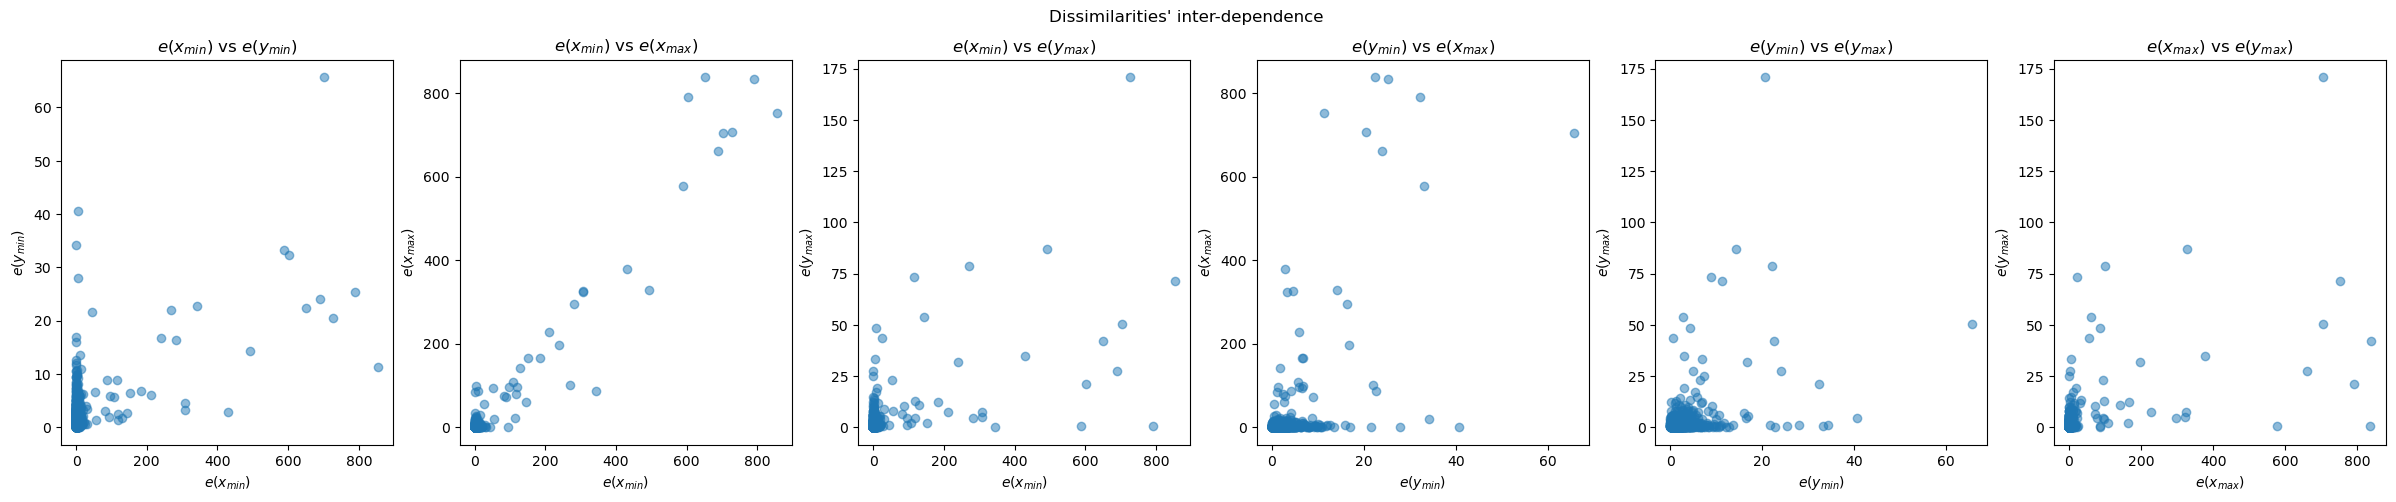

Num dissimilarities:  1558


Qp%       Avg       Std      Qrt1      Qrt2      Qrt3
Dim 0  11.539084  1.699270  1.865808  0.459203  1.106626  2.263089
Dim 1   6.081986  1.336261  1.174836  0.469767  1.026819  1.826987
Dim 2  11.154639  1.739821  1.746358  0.564024  1.127670  2.348082
Dim 3   5.681923  1.108516  1.038727  0.346716  0.803953  1.553773

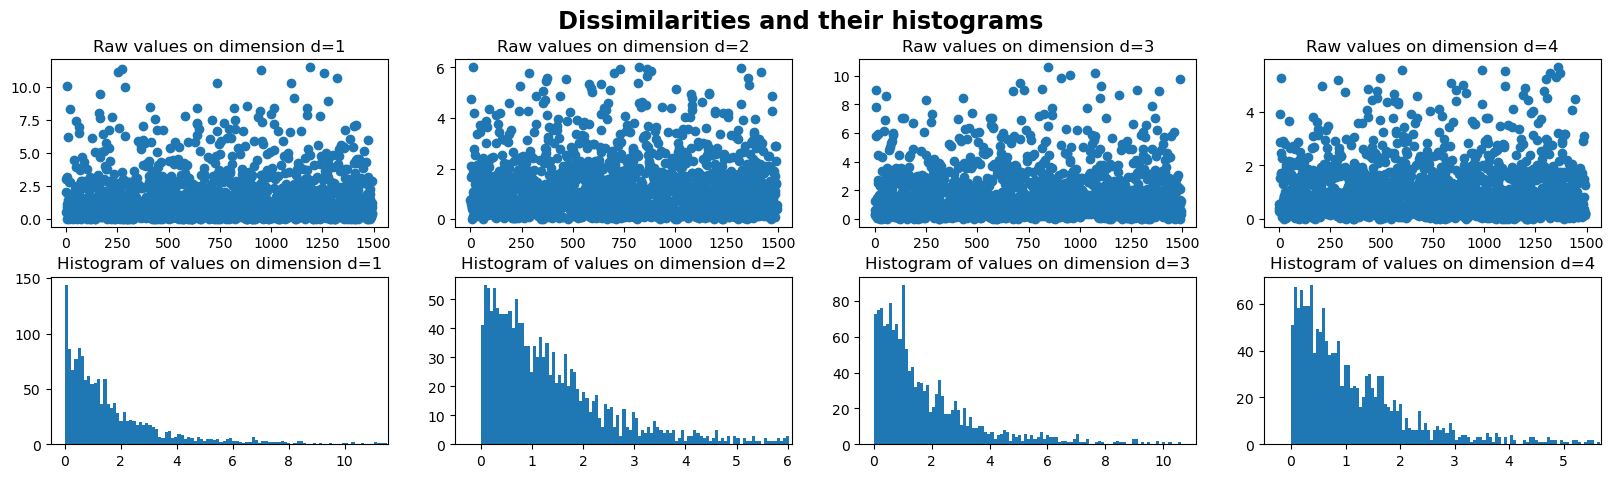

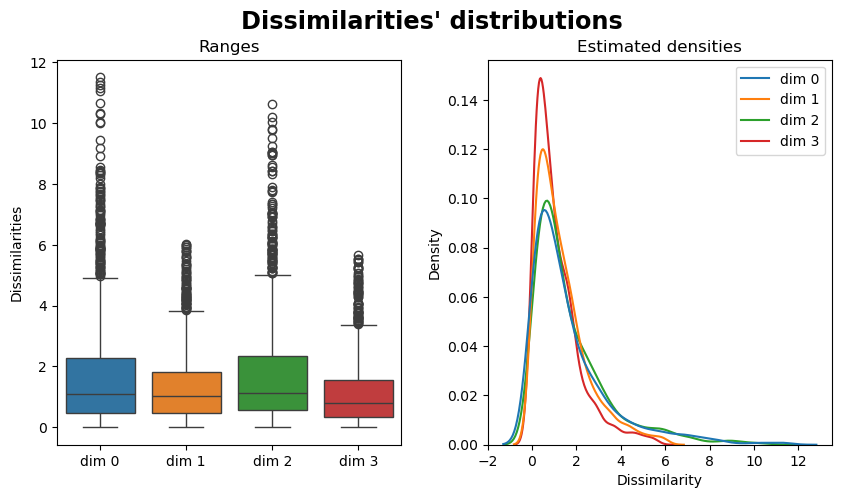

In [ ]:
dr = DissimilarityReporter(filter3)
dr.report(res3)

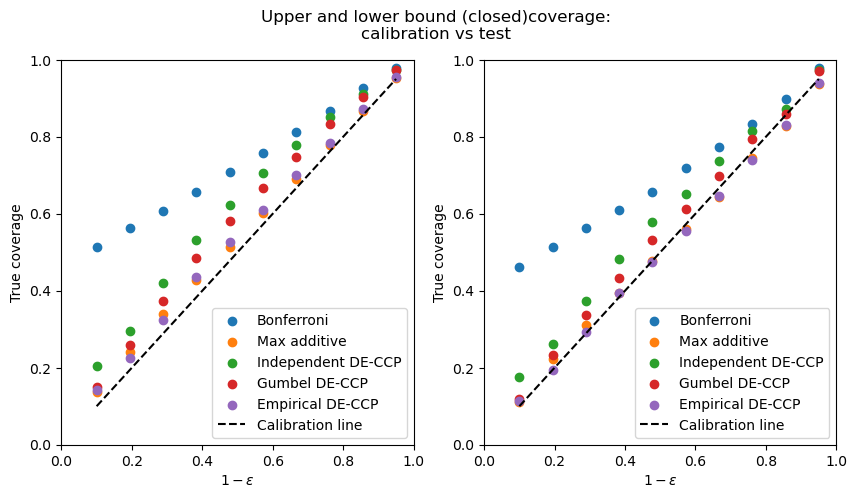

In [ ]:
ValidityReporter(approaches3, filter3).report(res3)

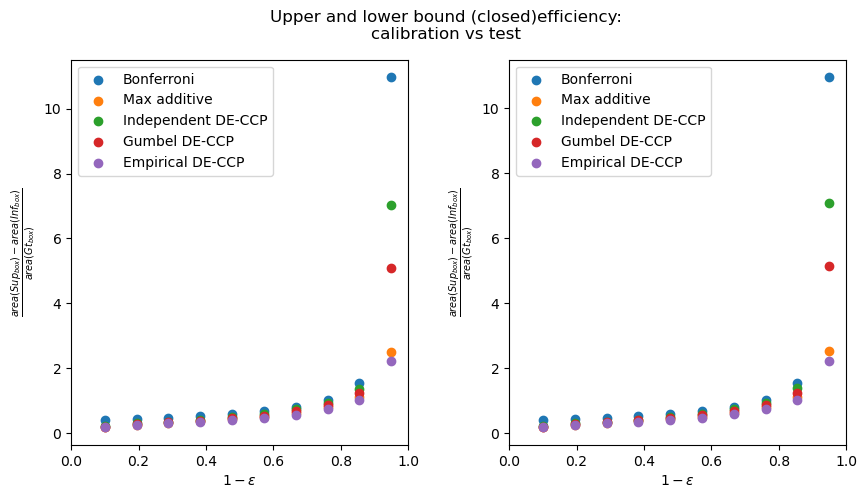

In [ ]:
EfficiencyReporter(approaches3, filter3).report(res3)

## KITTI visualization(s)

In [ ]:
kitti = FullKitti('datasets', download=True)
set_random_seed(123456)
params = {
    'k_folds': 10, 'cal_ratio': 0.12,
    'iou_threshold': 0.3, 'objectness_threshold': 0.3
}
DatasetDescriber().describe(kitti, **params)
#TBD -> summary table and an example of prediction with 2+1 boxes
#  https://datasetninja.com/kitti-object-detection

Total    Cal.    Test
Images     7481   807.0   748.1
B. boxes  28742  3100.1  2874.2

## Summary

In [ ]:
filters = (filter, filter2) #, filter3)
results = (res, res2) #, res3)

### Summarizing validity

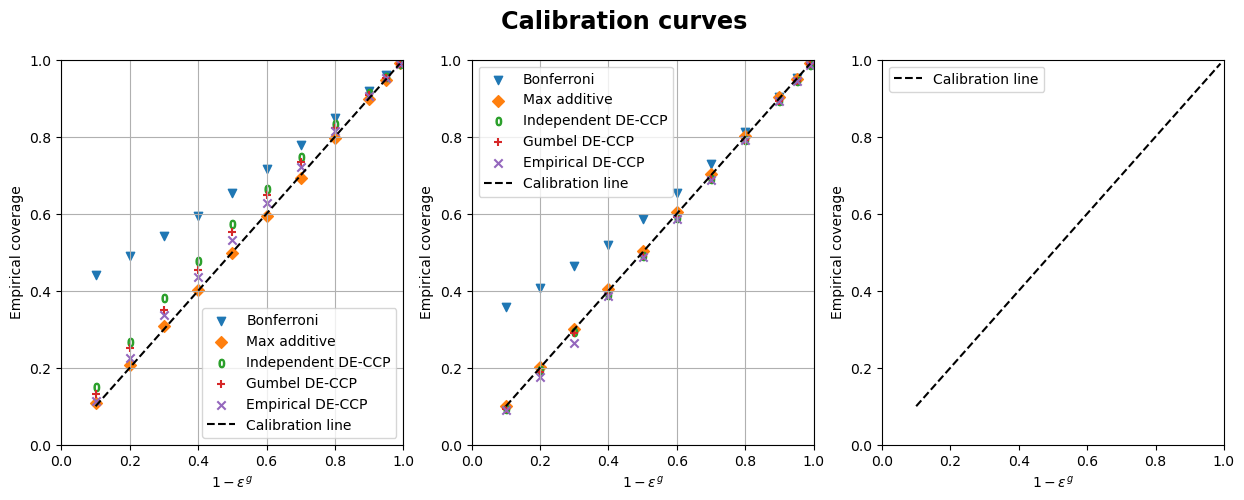

In [ ]:
mrkz=['v', 'D', '$0$', '+', 'x', 'o', 'P', 'X']
validity_tbls = SummaryReporter(approaches, filters, markers=mrkz).report(results, folds)

In [ ]:
validity_tbls[0] # Correlated(s)

$1 - \epsilon^g$   Bonferroni Max additive Independent DE-CCP  \
0               0.99  0.992±0.002  0.991±0.002        0.990±0.002   
1               0.95  0.960±0.006  0.947±0.007        0.955±0.006   
2               0.90  0.920±0.009  0.898±0.008        0.913±0.009   
3               0.80  0.849±0.011  0.796±0.013        0.834±0.012   
4               0.70  0.779±0.012  0.694±0.016        0.748±0.015   
5               0.60  0.715±0.012  0.594±0.017        0.665±0.014   
6               0.50  0.654±0.013  0.498±0.019        0.573±0.019   
7               0.40  0.594±0.011  0.403±0.015        0.478±0.019   
8               0.30  0.541±0.013  0.308±0.009        0.382±0.012   
9               0.20  0.490±0.013  0.208±0.008        0.267±0.013   
10              0.10  0.442±0.014  0.109±0.005        0.149±0.012   

   Gumbel DE-CCP Empirical DE-CCP  
0    0.990±0.002      0.990±0.002  
1    0.953±0.007      0.952±0.007  
2    0.908±0.009      0.906±0.009  
3    0.822±0.012      0.815±0.012  
4    0.735±0.014      0.722±0.009  
5    0.649±0.016      0.628±0.012  
6    0.553±0.012      0.531±0.011  
7    0.455±0.015      0.435±0.010  
8    0.351±0.012      0.338±0.014  
9    0.251±0.011      0.226±0.010  
10   0.131±0.012      0.114±0.011

In [ ]:
print(validity_tbls[0][0:3].to_latex(index=False, float_format="{:.2f}".format))

\begin{tabular}{rlllll}
\toprule
$1 - \epsilon^g$ & Bonferroni & Max additive & Independent DE-CCP & Gumbel DE-CCP & Empirical DE-CCP \\
\midrule
0.99 & 0.992±0.002 & 0.991±0.002 & 0.990±0.002 & 0.990±0.002 & 0.990±0.002 \\
0.95 & 0.960±0.006 & 0.947±0.007 & 0.955±0.006 & 0.953±0.007 & 0.952±0.007 \\
0.90 & 0.920±0.009 & 0.898±0.008 & 0.913±0.009 & 0.908±0.009 & 0.906±0.009 \\
\bottomrule
\end{tabular}



In [ ]:
validity_tbls[1] # uncorrelated(s)

$1 - \epsilon^g$   Bonferroni Max additive Independent DE-CCP  \
0               0.99  0.990±0.002  0.991±0.002        0.987±0.002   
1               0.95  0.952±0.007  0.951±0.004        0.945±0.006   
2               0.90  0.902±0.008  0.902±0.006        0.892±0.007   
3               0.80  0.812±0.011  0.802±0.009        0.792±0.010   
4               0.70  0.729±0.013  0.703±0.012        0.691±0.011   
5               0.60  0.654±0.013  0.605±0.012        0.590±0.012   
6               0.50  0.585±0.013  0.504±0.013        0.490±0.011   
7               0.40  0.520±0.014  0.404±0.014        0.390±0.011   
8               0.30  0.463±0.009  0.301±0.015        0.294±0.010   
9               0.20  0.408±0.010  0.202±0.012        0.193±0.008   
10              0.10  0.358±0.011  0.100±0.008        0.093±0.005   

   Gumbel DE-CCP Empirical DE-CCP  
0    0.988±0.003      0.987±0.003  
1    0.944±0.004      0.945±0.006  
2    0.892±0.008      0.894±0.009  
3    0.792±0.012      0.791±0.011  
4    0.690±0.010      0.688±0.010  
5    0.591±0.012      0.586±0.010  
6    0.491±0.011      0.488±0.010  
7    0.391±0.012      0.385±0.013  
8    0.291±0.010      0.265±0.047  
9    0.190±0.008      0.176±0.024  
10   0.092±0.006      0.090±0.008

In [ ]:
print(validity_tbls[1][0:3].to_latex(index=False, float_format="{:.2f}".format))

\begin{tabular}{rlllll}
\toprule
$1 - \epsilon^g$ & Bonferroni & Max additive & Independent DE-CCP & Gumbel DE-CCP & Empirical DE-CCP \\
\midrule
0.99 & 0.990±0.002 & 0.991±0.002 & 0.987±0.002 & 0.988±0.003 & 0.987±0.003 \\
0.95 & 0.952±0.007 & 0.951±0.004 & 0.945±0.006 & 0.944±0.004 & 0.945±0.006 \\
0.90 & 0.902±0.008 & 0.902±0.006 & 0.892±0.007 & 0.892±0.008 & 0.894±0.009 \\
\bottomrule
\end{tabular}



In [ ]:
validity_tbls[2] # KITTI

IndexError: list index out of range

In [ ]:
print(validity_tbls[2][0:3].to_latex(index=False, float_format="{:.2f}".format))

\begin{tabular}{rll}
\toprule
$1 - \epsilon^g$ & Max multiplicative & s.n. Empirical DE-CCP \\
\midrule
0.95 & 0.948±0.003 & 0.945±0.008 \\
0.86 & 0.851±0.008 & 0.847±0.007 \\
0.76 & 0.759±0.011 & 0.752±0.010 \\
\bottomrule
\end{tabular}



### Summarizing efficiency

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


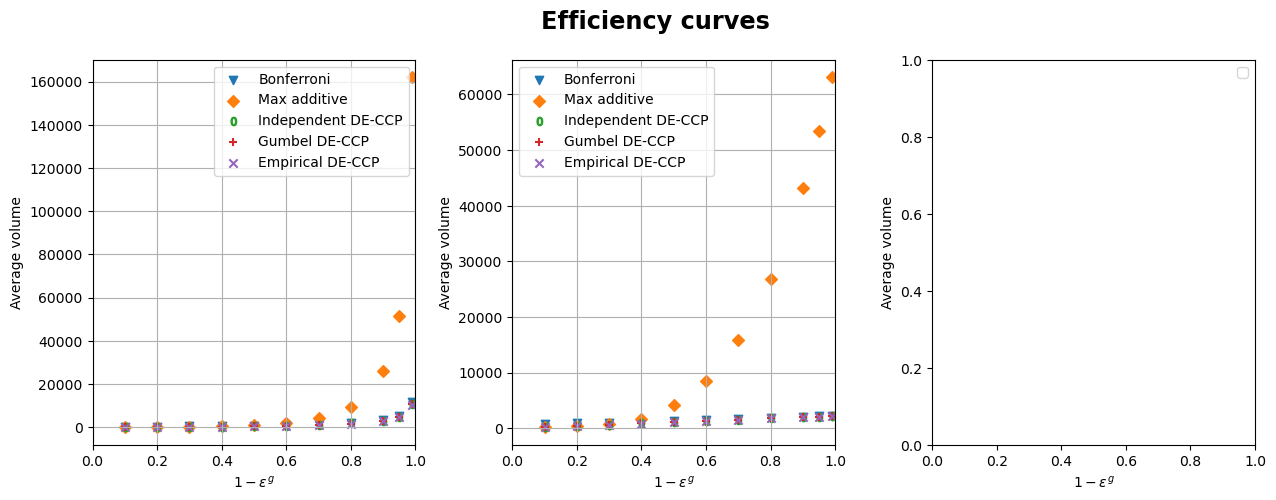

In [ ]:
efficiency_tbls = SummaryReporter(approaches, filters, efficiency_score=hypercube_volumes).report(results, folds)

In [ ]:
efficiency_tbls[0] # Correlated(s)

$1 - \epsilon^g$         Bonferroni       Max additive Independent DE-CCP  \
0               0.99  1.15e+04±8.89e+02  1.62e+05±8.09e+03  1.09e+04±7.70e+02   
1               0.95  5.16e+03±1.88e+02  5.16e+04±2.93e+03  4.95e+03±1.91e+02   
2               0.90  3.29e+03±1.70e+02  2.59e+04±1.66e+03  3.14e+03±1.43e+02   
3               0.80  1.92e+03±8.06e+01  9.48e+03±6.74e+02  1.76e+03±6.94e+01   
4               0.70  1.31e+03±5.06e+01  4.10e+03±2.21e+02  1.13e+03±4.11e+01   
5               0.60  9.55e+02±3.53e+01  1.97e+03±1.06e+02  7.52e+02±2.46e+01   
6               0.50  7.20e+02±2.45e+01  1.02e+03±5.21e+01  5.05e+02±1.82e+01   
7               0.40  5.57e+02±1.93e+01  5.29e+02±2.28e+01  3.32e+02±1.33e+01   
8               0.30  4.40e+02±1.80e+01  2.76e+02±1.15e+01  2.07e+02±7.61e+00   
9               0.20  3.50e+02±1.38e+01  1.28e+02±5.52e+00  1.13e+02±3.59e+00   
10              0.10  2.81e+02±1.19e+01  4.30e+01±2.04e+00  4.61e+01±1.73e+00   

        Gumbel DE-CCP   Empirical DE-CCP  
0   1.06e+04±6.77e+02  1.05e+04±6.73e+02  
1   4.79e+03±1.68e+02  4.72e+03±1.69e+02  
2   3.01e+03±1.35e+02  2.96e+03±1.38e+02  
3   1.67e+03±6.08e+01  1.59e+03±5.80e+01  
4   1.06e+03±3.37e+01  9.88e+02±2.93e+01  
5   6.95e+02±2.22e+01  6.35e+02±1.88e+01  
6   4.61e+02±1.68e+01  4.14e+02±1.17e+01  
7   2.99e+02±1.09e+01  2.67e+02±1.03e+01  
8   1.83e+02±5.94e+00  1.60e+02±7.22e+00  
9   9.77e+01±3.26e+00  8.35e+01±4.03e+00  
10  3.83e+01±1.74e+00  3.22e+01±2.01e+00

In [ ]:
print(efficiency_tbls[0][0:3].to_latex(index=False, float_format="{:.2f}".format))

\begin{tabular}{rlllll}
\toprule
$1 - \epsilon^g$ & Bonferroni & Max additive & Independent DE-CCP & Gumbel DE-CCP & Empirical DE-CCP \\
\midrule
0.99 & 1.15e+04±8.89e+02 & 1.62e+05±8.09e+03 & 1.09e+04±7.70e+02 & 1.06e+04±6.77e+02 & 1.05e+04±6.73e+02 \\
0.95 & 5.16e+03±1.88e+02 & 5.16e+04±2.93e+03 & 4.95e+03±1.91e+02 & 4.79e+03±1.68e+02 & 4.72e+03±1.69e+02 \\
0.90 & 3.29e+03±1.70e+02 & 2.59e+04±1.66e+03 & 3.14e+03±1.43e+02 & 3.01e+03±1.35e+02 & 2.96e+03±1.38e+02 \\
\bottomrule
\end{tabular}



In [ ]:
efficiency_tbls[1] # Uncorrelated(s)

$1 - \epsilon^g$         Bonferroni       Max additive Independent DE-CCP  \
0               0.99  2.22e+03±3.86e+00  6.31e+04±3.43e+02  2.21e+03±4.39e+00   
1               0.95  2.13e+03±1.12e+01  5.34e+04±5.71e+02  2.12e+03±7.99e+00   
2               0.90  2.02e+03±7.93e+00  4.32e+04±4.71e+02  2.00e+03±1.07e+01   
3               0.80  1.82e+03±8.97e+00  2.69e+04±4.58e+02  1.78e+03±1.31e+01   
4               0.70  1.64e+03±1.63e+01  1.58e+04±5.22e+02  1.55e+03±1.22e+01   
5               0.60  1.47e+03±1.25e+01  8.51e+03±4.03e+02  1.32e+03±1.28e+01   
6               0.50  1.32e+03±1.51e+01  4.16e+03±2.30e+02  1.10e+03±1.32e+01   
7               0.40  1.17e+03±1.27e+01  1.72e+03±1.10e+02  8.72e+02±1.47e+01   
8               0.30  1.04e+03±1.41e+01  7.29e+02±3.50e+01  6.50e+02±1.29e+01   
9               0.20  9.17e+02±1.28e+01  4.50e+02±1.64e+01  4.27e+02±1.48e+01   
10              0.10  8.05e+02±1.48e+01  2.26e+02±1.38e+01  2.10e+02±8.30e+00   

        Gumbel DE-CCP   Empirical DE-CCP  
0   2.21e+03±4.07e+00  2.21e+03±3.45e+00  
1   2.12e+03±7.66e+00  2.12e+03±9.99e+00  
2   2.00e+03±1.03e+01  2.00e+03±1.04e+01  
3   1.77e+03±1.37e+01  1.77e+03±1.16e+01  
4   1.55e+03±1.24e+01  1.54e+03±1.73e+01  
5   1.32e+03±1.22e+01  1.31e+03±1.47e+01  
6   1.10e+03±1.45e+01  1.09e+03±1.33e+01  
7   8.71e+02±1.52e+01  8.60e+02±1.67e+01  
8   6.45e+02±1.45e+01  5.91e+02±9.97e+01  
9   4.24e+02±1.24e+01  3.90e+02±4.57e+01  
10  2.09e+02±7.72e+00  1.95e+02±8.93e+00

In [ ]:
print(efficiency_tbls[1][0:3].to_latex(index=False, float_format="{:.2f}".format))

\begin{tabular}{rlllll}
\toprule
$1 - \epsilon^g$ & Bonferroni & Max additive & Independent DE-CCP & Gumbel DE-CCP & Empirical DE-CCP \\
\midrule
0.99 & 2.22e+03±3.86e+00 & 6.31e+04±3.43e+02 & 2.21e+03±4.39e+00 & 2.21e+03±4.07e+00 & 2.21e+03±3.45e+00 \\
0.95 & 2.13e+03±1.12e+01 & 5.34e+04±5.71e+02 & 2.12e+03±7.99e+00 & 2.12e+03±7.66e+00 & 2.12e+03±9.99e+00 \\
0.90 & 2.02e+03±7.93e+00 & 4.32e+04±4.71e+02 & 2.00e+03±1.07e+01 & 2.00e+03±1.03e+01 & 2.00e+03±1.04e+01 \\
\bottomrule
\end{tabular}



In [ ]:
efficiency_tbls[2] # KITTI

IndexError: list index out of range

In [ ]:
print(efficiency_tbls[2].to_latex(index=False, float_format="{:.2f}".format))

\begin{tabular}{rll}
\toprule
$1 - \epsilon^g$ & Max multiplicative & s.n. Empirical DE-CCP \\
\midrule
0.95 & 5.46e+06±3.43e+05 & 1.51e+06±1.65e+05 \\
0.86 & 1.28e+06±1.23e+05 & 4.67e+05±3.84e+04 \\
0.76 & 4.76e+05±4.16e+04 & 2.04e+05±1.89e+04 \\
0.67 & 2.00e+05±1.88e+04 & 9.65e+04±8.98e+03 \\
0.57 & 9.16e+04±8.32e+03 & 4.67e+04±3.29e+03 \\
0.48 & 4.07e+04±3.47e+03 & 2.19e+04±2.10e+03 \\
0.38 & 1.75e+04±1.79e+03 & 9.72e+03±9.11e+02 \\
0.29 & 6.92e+03±6.31e+02 & 3.80e+03±4.10e+02 \\
0.19 & 2.24e+03±2.88e+02 & 1.18e+03±1.29e+02 \\
0.10 & 4.93e+02±6.61e+01 & 2.70e+02±1.84e+01 \\
\bottomrule
\end{tabular}



In [ ]:
len(res.logs[0]['cal_dissims']), len(res2.logs[0]['cal_dissims']), len(res3.logs[0]['cal_dissims'])

NameError: name 'res3' is not defined

In [ ]:
[res.logs[i]['cal_dissims'].shape for i in range(10)]

[(3786, 4),
 (3786, 4),
 (3786, 4),
 (3786, 4),
 (3786, 4),
 (3786, 4),
 (3786, 4),
 (3786, 4),
 (3786, 4),
 (3786, 4)]

In [ ]:
""" To Do(s):
    - produce a manual Tikz picture -> Done, 
    - rewrite the methodology section -> Done,
    - rewrite the results section -> ,
    - write the discussion section,
    - write the conclusion section,
    - clean the code -> make a 'release branch with a minimal code':
        - only fine tune (for now/untill ECAI),
        - fix quantile level vs (1 - eps)*(1 + 1/n),
        - correct the summary table and plot descriptive statistics -> Done,
        - modify the generated data (break max-additive) and fix the gumbel copula,
        - use a one class panda frame with png names (make sure it's 1D, 2D & 3D compatible?),
        - use plotly or a board/logger for detailed demos,
        - use seaborn for summarized results?,
        - use boxplots rather than scatters for effs?,
        - use pytorch lightning to parallelize tra & conf on 1-n GPU(s),
        - use hydra to serialize the confs of experiments,
        - use mappy to reduce conf boiler plate code & parallelize on GPU(s)?,
        - pub3, 4 & 5 = mtv qtls, mxd/true m-task c.o.d & coRL UQdrivenRL,
            - read some of that mtv qtl paper & pbcrs.com::mxd ...,
""";
#make the cfmz|reporter plot some random 3-10 pictures?!?